In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# importando os dados de exemplo
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([0,
              0,
              0,
              1])

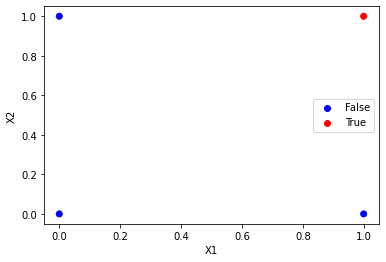

In [83]:
# plotando os exemplos, e seu resultado (AND)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(handles=[plt.scatter([], [], c='b'), plt.scatter([], [], c='r')], 
           labels=['False', 'True'], 
           loc='center right')
plt.show()

In [194]:
def treinar_perceptron_discreto(X, Y, W, bias, eta, epoca_max):

  # estrutura para guardar o historico de erro por epoca
  erro_total = []

  # estruturas para armazenar o peso e bias de cada epoca
  W_epoca = []  
  bias_epoca = []

  # TREINAMENTO
  for epoch in range(epoca_max):

      erro_ite = [] # estrutura para armazenar o erro por iteracao (exemplo)
      erro_epoca = 0
      
      for i, (x, y_true) in enumerate(zip(X, Y)):
          y_pred = np.dot(x, W) + bias # predizendo o y dado a entrada x
          y_pred = 0 if y_pred <= 0 else 1 
          
          # calculando o erro
          erro = y_true - y_pred

          # atualizando os pesos
          W = W + (eta * erro * x)
          bias = bias + (eta * erro * 1)

          # somando o erro ao total da epoch
          erro_epoca += int(erro != 0) 

      # armazenando o historico de pesos, bias e erro
      W_epoca.append(np.copy(W))
      bias_epoca.append(bias)
      erro_total.append(erro_epoca)

  return W, bias, W_epoca, bias_epoca, erro_total

In [204]:
# Inicializando os pesos e bias do perceptron
W = np.array([0.0, 0.0])
bias = 1.0

# Configurando a taxa de aprendizado
eta = 0.1

# Configurando o criterio de parada (epochs)
epoca_max = 20

W, bias, W_epoca, bias_epoca, erro_total = treinar_perceptron_discreto(X, Y, W, bias, eta, epoca_max)

In [205]:
def plot_perceptron_historico(W_epoca, bias_epoca, erro_total):

  # Plotando as entradas
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', s=100, edgecolors='black')

  # Configurando o plot para melhor visualização
  plt.xlim([-0.1, 1.1])
  plt.ylim([-0.1, 1.1])

  # Plotando as linhas de separacao para cada epoca
  for epoca, pesos in enumerate(W_epoca):

      cor_linha = 'red' if erro_total[epoca] == 0 else 'black'

      linha_x = np.linspace(-0.1, 1.1)
      linha_y = -(pesos[0] * linha_x + bias_epoca[epoca]) / pesos[1]
      opacidade = epoca / epoca_max
      plt.plot(linha_x, linha_y, color=cor_linha, alpha=opacidade)
      
  # Add axis labels and a title
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Porta AND através de um perceptron discreto')
  plt.show()

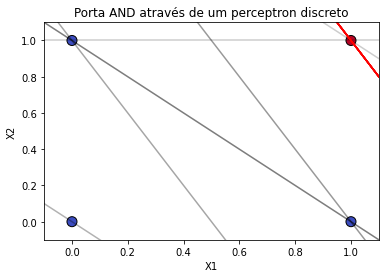

In [206]:
plot_perceptron_historico(W_epoca, bias_epoca, erro_total)

## Case 1 - Dataset AND

In [207]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([0,
              0,
              0,
              1])

In [208]:
### Alterando os pesos iniciais para 0.1, 0.1, 1
W = np.array([0.1, 0.1])
bias = 1.0

# Alterando a taxa de aprendizado para 0.1
eta = 0.01

# Configurando o criterio de parada (epochs)
epoca_max = 20

W, bias, W_epoca, bias_epoca, erro_total = treinar_perceptron_discreto(X, Y, W, bias, eta, epoca_max)

In [209]:
# verificando o erro
erro_total

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

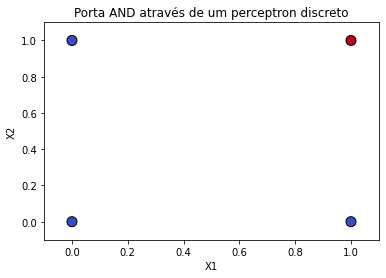

In [210]:
# plot do treinamento
plot_perceptron_historico(W_epoca, bias_epoca, erro_total)

As linhas de separação nem aparecem no gráfico. O treinamento com esses hiperparametros nao teve sucesso.

## Case 2 - Dataset Iris


In [211]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [212]:
# Importando o dataset e selecionando apenas setosa e versicolor
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
dataset = iris.loc[(iris[4] != 'Iris-versicolor'), [0, 1, 4]]
dataset = dataset.iloc[:, [0, 1, 2]].values

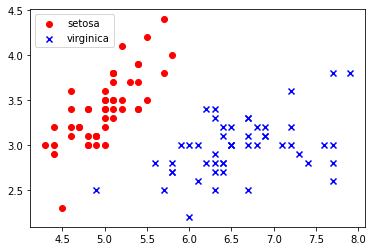

In [213]:
# plotando o dataset
plt.scatter(dataset[dataset[:, 2] == 'Iris-setosa', 0], dataset[dataset[:, 2] == 'Iris-setosa', 1], color='red', marker='o', label='setosa')
plt.scatter(dataset[dataset[:, 2] == 'Iris-virginica', 0], dataset[dataset[:, 2] == 'Iris-virginica', 1], color='blue', marker='x', label='virginica')
plt.legend(loc='upper left')
plt.show()

In [214]:
# convertendo as especies para classes binarias
le = LabelEncoder()
dataset[:, 2] = le.fit_transform(dataset[:, 2])
classes_bin = np.where(dataset[:, 2] == 0, 0, 1)

In [215]:
# normalizando as duas features (de 0 a 1)
x1 = dataset[:, 0] / np.max(dataset[:, 0])
x2 = dataset[:, 1] / np.max(dataset[:, 1])

In [216]:
# montando os conjuntos
X_iris = np.column_stack((x1, x2))
Y_iris = classes_bin

In [217]:
# utilizando os perceptrons criados para o treinamento
W_iris = np.array([0.1, 0.1])
bias_iris = 1.0
eta_iris = 0.01
epoca_max_iris = 20

(W_iris, 
 bias_iris,
 W_epoca_iris,
 bias_epoca_iris,
 erro_total_iris) = treinar_perceptron_discreto(X_iris,
                                                Y_iris,
                                                W_iris,
                                                bias_iris,
                                                eta_iris,
                                                epoca_max_iris)

In [218]:
print(erro_total_iris)

[50, 21, 19, 17, 17, 17, 17, 15, 15, 15, 13, 13, 13, 12, 12, 12, 13, 11, 11, 11]


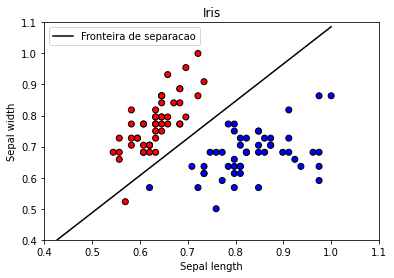

In [220]:
# plotando A FRONTEIRA DE SEPARACAO
colors = np.where(Y_iris == 1, 'b', 'r')
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=colors, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim([0.4, 1.1])
plt.ylim([0.4, 1.1])

plt.title('Iris')

x1 = np.linspace(0, 1)
x2 = -(W_iris[0] + W_iris[1] * x1) / bias_iris
plt.plot(x1, x2, 'k-', label='Fronteira de separacao')

plt.legend()
plt.show()

In [ ]:
# Refazendo agora apenas com as classes versicolor e virginica

In [221]:
# Importando o dataset e selecionando apenas setosa e versicolor
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
dataset = iris.loc[(iris[4] != 'Iris-setosa'), [0, 1, 4]]
dataset = dataset.iloc[:, [0, 1, 2]].values

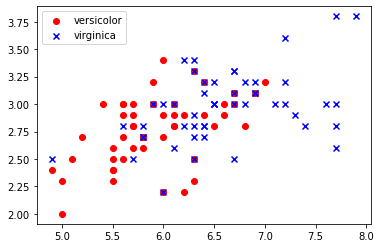

In [222]:
# plotando o dataset
plt.scatter(dataset[dataset[:, 2] == 'Iris-versicolor', 0], dataset[dataset[:, 2] == 'Iris-versicolor', 1], color='red', marker='o', label='versicolor')
plt.scatter(dataset[dataset[:, 2] == 'Iris-virginica', 0], dataset[dataset[:, 2] == 'Iris-virginica', 1], color='blue', marker='x', label='virginica')
plt.legend(loc='upper left')
plt.show()

In [223]:
# convertendo as especies para classes binarias
le = LabelEncoder()
dataset[:, 2] = le.fit_transform(dataset[:, 2])
classes_bin = np.where(dataset[:, 2] == 0, 0, 1)

In [224]:
# normalizando as duas features (de 0 a 1)
x1 = dataset[:, 0] / np.max(dataset[:, 0])
x2 = dataset[:, 1] / np.max(dataset[:, 1])

In [225]:
# montando os conjuntos
X_iris = np.column_stack((x1, x2))
Y_iris = classes_bin

In [227]:
# utilizando os perceptrons criados para o treinamento
W_iris = np.array([1.1, 0.1])
bias_iris = 1.0
eta_iris = 0.10
epoca_max_iris = 20

(W_iris, 
 bias_iris,
 W_epoca_iris,
 bias_epoca_iris,
 erro_total_iris) = treinar_perceptron_discreto(X_iris,
                                                Y_iris,
                                                W_iris,
                                                bias_iris,
                                                eta_iris,
                                                epoca_max_iris)

In [228]:
print(erro_total_iris)

[12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2]


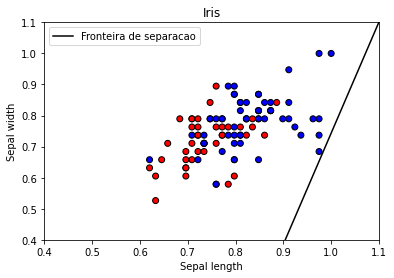

In [229]:
# plotando A FRONTEIRA DE SEPARACAO
colors = np.where(Y_iris == 1, 'b', 'r')
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=colors, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim([0.4, 1.1])
plt.ylim([0.4, 1.1])

plt.title('Iris')

x1 = np.linspace(0, 10)
x2 = -(W_iris[0] + W_iris[1] * x1) / bias_iris
plt.plot(x1, x2, 'k-', label='Fronteira de separacao')

plt.legend()
plt.show()